## Proyecto Final Logística 
---
<li>Luna Moreno</li>
<li>Carles Adam</li>
<li>Enrique Sayas</li>

## 0. Cargar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS

from structure import instance, solution
from algorithms import grasp

## 1. Introducción

In [2]:
def resolver(path, alpha, tiempo):
    inst = instance.readInstance(path)
    sol, _, _ = grasp.execute(inst, tiempo, alpha)
    solution.printSolution(sol)
    return sol["sol"]

def visualizar_solucion(path, alpha=None, tiempo=1):
    if alpha != None:
        sol = resolver(path, alpha, tiempo)
    else:
        sol = []

    # Cargar el archivo con las distancias
    distancias = pd.read_table(path, sep = " ", skiprows=1, header=None)
    # Creamos la matriz de distancias
    n_nodos = distancias.loc[:,1].max()+1
    matriz_distancias = np.zeros([n_nodos,n_nodos])

    for _ , fila in distancias.iterrows():
        i, j, distancia = fila
        matriz_distancias[int(i),int(j)] = distancia
        matriz_distancias[int(j),int(i)] = distancia

    # Visualizamos su representación en 2D
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=33)
    coordenadas_2d = mds.fit_transform(matriz_distancias)

    # Etiquetas para los puntos (opcional)
    colores = ["#efb810" if i in sol else "black" for i, (x, y) in enumerate(coordenadas_2d)]

    plt.figure(figsize=(6, 6))
    plt.scatter(coordenadas_2d[:, 0], coordenadas_2d[:, 1], color=colores, marker='o')     

    plt.title("Puntos en 2D a partir de la matriz de distancias")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.grid(True)
    plt.show()

Solution: 130 382 388 261 135 12 141 399 280 25 411 35 36 165 294 37 422 40 425 303 310 311 56 185 445 191 193 323 459 460 464 466 468 344 347 221 478 354 233 235 236 491 238 111 112 113 371 118 377 126 
Objective Value: 7674.19


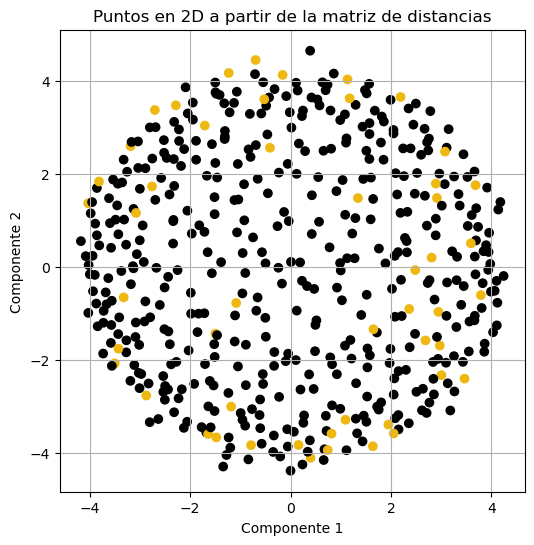

In [3]:
visualizar_solucion("instances/MDG-a_9_n500_m50.txt",alpha=0)

## 2. Modelo GRASP

### 2.1. Calibrar $\alpha$

### 2.1.1 1 segundo de tiempo de ejecución

In [4]:
def calibrar_alfa(path):
    data = pd.read_csv(path, sep=";")
    
    # Calcular el máximo y la desviación estándar
    data["Maximo"] = float(0)
    for archivo in data["archivo"].unique():
        data.loc[data["archivo"] == archivo,"Maximo"] = data[data["archivo"] == archivo]["valor"].values.max()
    data["Dev"] = (data["Maximo"] - data["valor"]) / data["Maximo"]
    
    alpha_max = data.loc[:,["alpha","Dev"]].groupby("alpha").mean("Dev").sort_values("Dev").head(1).index[0]

    data["Color"] = ['Maximo' if x[1]["valor"] == x[1]["Maximo"] else "Otros" for x in data.iterrows()]
    data.loc[data["alpha"] == alpha_max, "Color"] = f"$\\alpha$ = {alpha_max}"

    return data, alpha_max

data_1, alpha_max_1 = calibrar_alfa("resultados/resultados_1.0s.csv")

# Seleccionar el mejor alfa
data_1.loc[:,["alpha","Dev"]].groupby("alpha").mean("Dev").sort_values("Dev").head()

,Dev
alpha,
0.05,0.003572
0.15,0.003696
0.10,0.003820
0.00,0.003961
0.20,0.004626


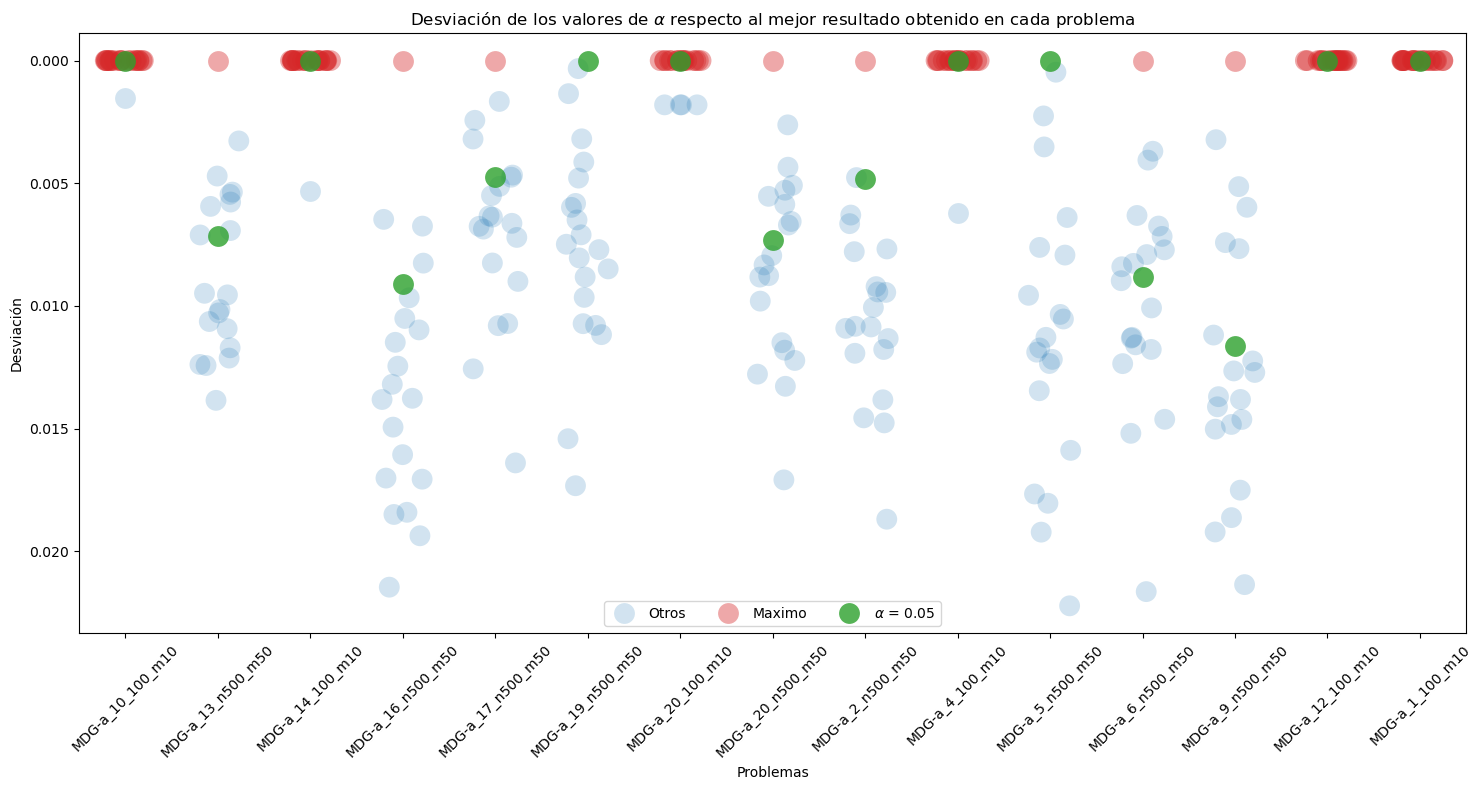

In [5]:
custom_palette = {
    'Otros': '#1f77b4',
    f"$\\alpha$ = {alpha_max_1}": '#2ca02c',
    'Maximo': '#d62728'
}

fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(data=data_1[data_1["Color"] == "Otros"], x="archivo", y="Dev", hue="Color", alpha=0.2, ax=ax, size=15, jitter=0.25, palette=custom_palette)
sns.stripplot(data=data_1[data_1["Color"] == "Maximo"], x="archivo", y="Dev", hue="Color", alpha=0.4, ax=ax, size=15, jitter=0.25, palette=custom_palette)
sns.stripplot(data=data_1[data_1["Color"] == f"$\\alpha$ = {alpha_max_1}"], x="archivo", y="Dev", hue="Color", alpha=0.8, ax=ax, size=15, jitter=0.25, palette=custom_palette)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel("Problemas")
ax.set_ylabel("Desviación")
ax.invert_yaxis()
plt.title("Desviación de los valores de $\\alpha$ respecto al mejor resultado obtenido en cada problema")
plt.legend(ncol=3, loc="lower center", bbox_to_anchor=(0.5, 0))
plt.tight_layout()
plt.show()

### 2.1.2 5 segundos de tiempo de ejecución

In [6]:
data_5, alpha_max_5 = calibrar_alfa("resultados/resultados_5.0s.csv")

# Seleccionar el mejor alfa
data_5.loc[:,["alpha","Dev"]].groupby("alpha").mean("Dev").sort_values("Dev").head()

,Dev
alpha,
0.10,0.001653
0.05,0.002375
0.00,0.002507
0.15,0.002597
0.40,0.002935


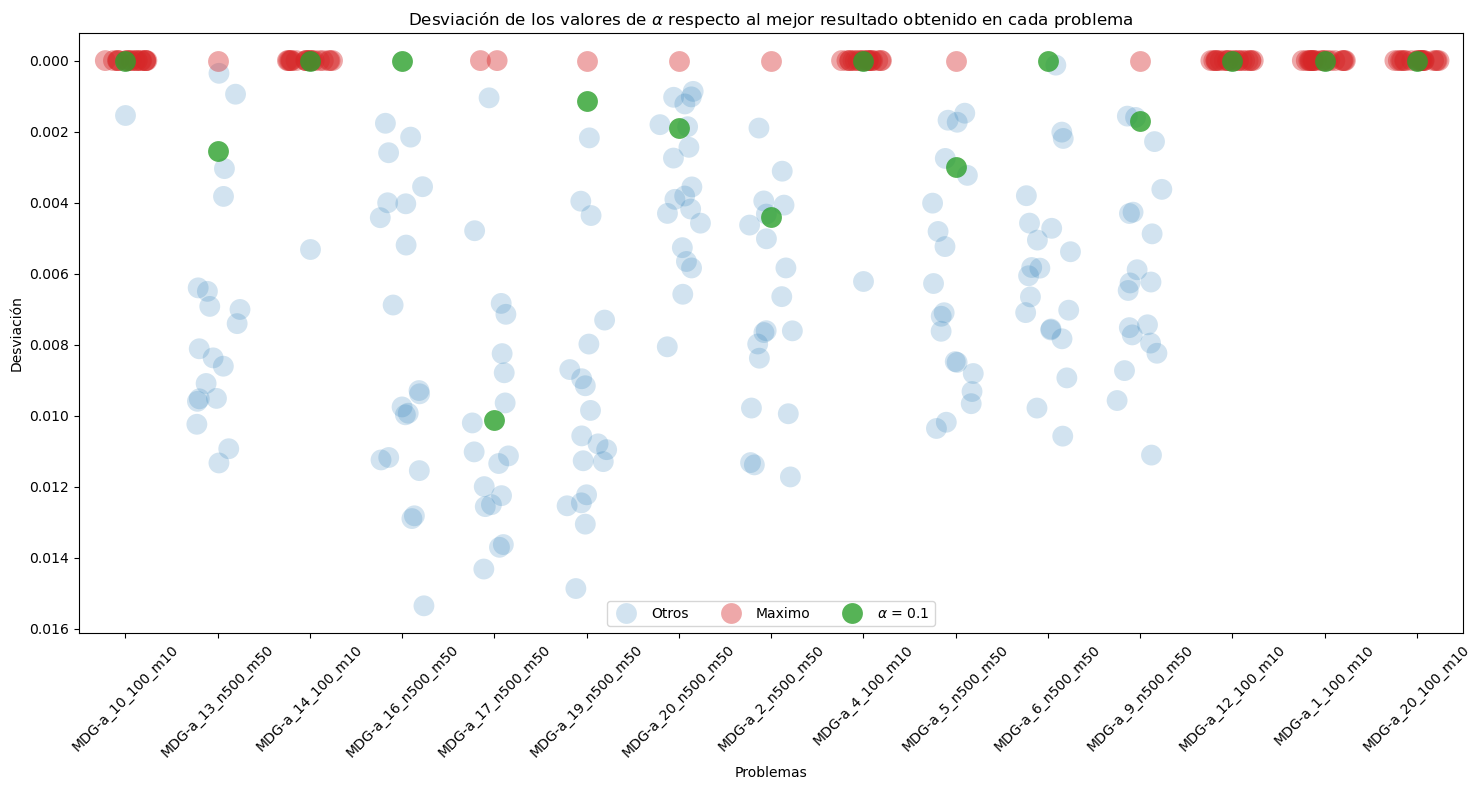

In [7]:
custom_palette = {
    'Otros': '#1f77b4',
    f"$\\alpha$ = {alpha_max_5}": '#2ca02c',
    'Maximo': '#d62728'
}

fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(data=data_5[data_5["Color"] == "Otros"], x="archivo", y="Dev", hue="Color", alpha=0.2, ax=ax, size=15, jitter=0.25, palette=custom_palette)
sns.stripplot(data=data_5[data_5["Color"] == "Maximo"], x="archivo", y="Dev", hue="Color", alpha=0.4, ax=ax, size=15, jitter=0.25, palette=custom_palette)
sns.stripplot(data=data_5[data_5["Color"] == f"$\\alpha$ = {alpha_max_5}"], x="archivo", y="Dev", hue="Color", alpha=0.8, ax=ax, size=15, jitter=0.25, palette=custom_palette)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel("Problemas")
ax.set_ylabel("Desviación")
ax.invert_yaxis()
plt.title("Desviación de los valores de $\\alpha$ respecto al mejor resultado obtenido en cada problema")
plt.legend(ncol=3, loc="lower center", bbox_to_anchor=(0.5, 0))
plt.tight_layout()
plt.show()

### 2.1.3 10 segundos de tiempo de ejecución

In [8]:
data_10, alpha_max_10 = calibrar_alfa("resultados/resultados_10.0s.csv")

# Seleccionar el mejor alfa
data_10.loc[:,["alpha","Dev"]].groupby("alpha").mean("Dev").sort_values("Dev").head()

,Dev
alpha,
0.05,0.002668
0.50,0.002839
0.10,0.002919
0.15,0.002924
0.00,0.002976


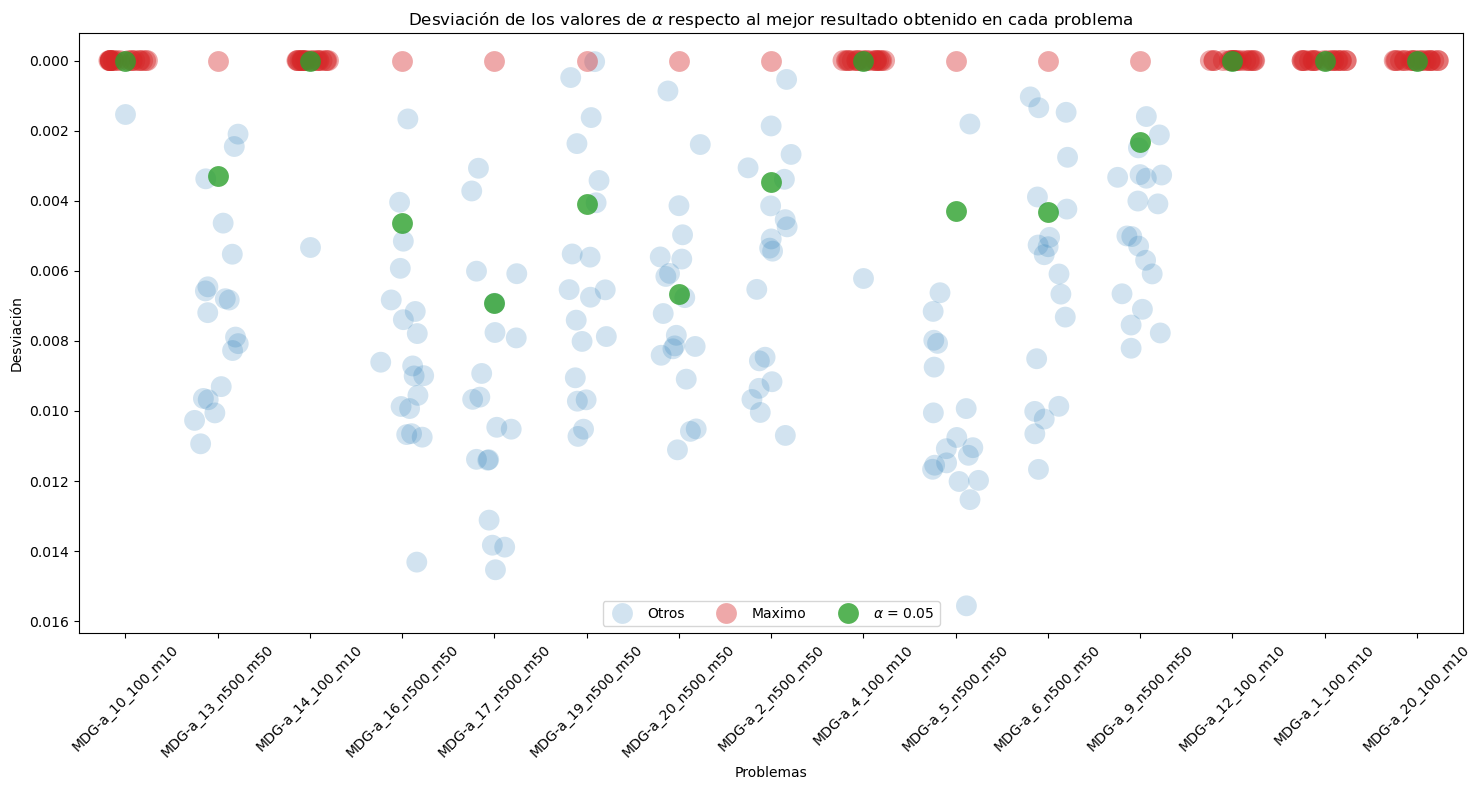

In [9]:
custom_palette = {
    'Otros': '#1f77b4',
    f"$\\alpha$ = {alpha_max_10}": '#2ca02c',
    'Maximo': '#d62728'
}

fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(data=data_10[data_10["Color"] == "Otros"], x="archivo", y="Dev", hue="Color", alpha=0.2, ax=ax, size=15, jitter=0.25, palette=custom_palette)
sns.stripplot(data=data_10[data_10["Color"] == "Maximo"], x="archivo", y="Dev", hue="Color", alpha=0.4, ax=ax, size=15, jitter=0.25, palette=custom_palette)
sns.stripplot(data=data_10[data_10["Color"] == f"$\\alpha$ = {alpha_max_10}"], x="archivo", y="Dev", hue="Color", alpha=0.8, ax=ax, size=15, jitter=0.25, palette=custom_palette)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel("Problemas")
ax.set_ylabel("Desviación")
ax.invert_yaxis()
plt.title("Desviación de los valores de $\\alpha$ respecto al mejor resultado obtenido en cada problema")
plt.legend(ncol=3, loc="lower center", bbox_to_anchor=(0.5, 0))
plt.tight_layout()
plt.show()

### 2.1.4 Selección de $\alpha$

In [10]:
data_todos = pd.concat([data_1, data_5, data_10])
data_todos["segundos"] = np.floor(data_todos["tiempo"])
data_todos = data_todos[["alpha","segundos","Dev"]]
data_todos_grouped = data_todos.groupby(["alpha","segundos"]).mean().reset_index()

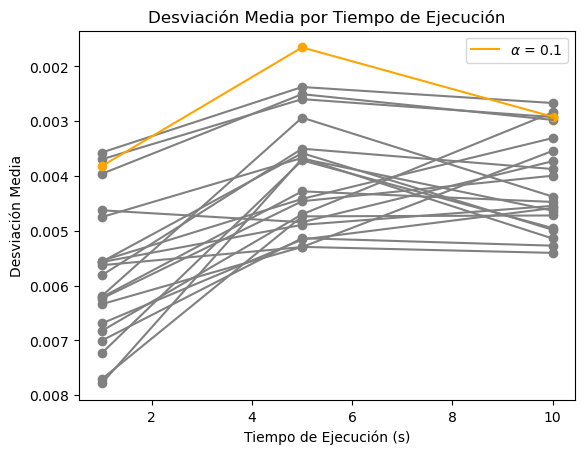

In [11]:
fig, ax = plt.subplots()
for alpha in [i / 100 for i in range(0,101)]:
    if alpha != 0.1:
        ax.plot(data_todos_grouped[data_todos_grouped["alpha"] == alpha]["segundos"], data_todos_grouped[data_todos_grouped["alpha"] == alpha]["Dev"], color = "gray")
        ax.scatter(x = data_todos_grouped[data_todos_grouped["alpha"] == alpha]["segundos"], y = data_todos_grouped[data_todos_grouped["alpha"] == alpha]["Dev"], color = "gray")
ax.plot(data_todos_grouped[data_todos_grouped["alpha"] == 0.1]["segundos"], data_todos_grouped[data_todos_grouped["alpha"] == 0.1]["Dev"], color = "orange", label = "$\\alpha$ = 0.1")
ax.scatter(x = data_todos_grouped[data_todos_grouped["alpha"] == 0.1]["segundos"], y = data_todos_grouped[data_todos_grouped["alpha"] == 0.1]["Dev"], color = "orange")
ax.invert_yaxis()
ax.set_xlabel("Tiempo de Ejecución (s)")
ax.set_ylabel("Desviación Media")
ax.set_title("Desviación Media por Tiempo de Ejecución")
plt.legend()
plt.show()

Se utilizará $\alpha = 0.1$.

## 3. Path Relinking

La figura muestra la desviación de los valores de alpha respecto al mejor resultado obtenido en cada problema. Las soluciones originales se representan en azul, destacándose en amarillo las mejores soluciones (Maximo) y en verde las correspondientes a alpha = 0.85. Los puntos rojos indican las soluciones generadas mediante Path Relinking, las cuales exploran caminos intermedios entre las mejores configuraciones. Se observa que el Path Relinking tiende a generar soluciones con desviaciones muy bajas, compitiendo favorablemente con los mejores valores originales.

## 4. Comparación

## 5. Conclusiones

## 6. Bibliografía

Resende, M. G. C., Ribeiro, C. C., Glover, F., & Martí, R. (2010). Scatter search and path-relinking: Fundamentals, advances, and applications. En M. Gendreau & J.-Y. Potvin (Eds.), Handbook of Metaheuristics (pp. 87–107). Springer. https://doi.org/10.1007/978-1-4419-1665-5_4